# Capstone Project - The Battle of the Neighborhoods

## Table of contents
* [Introduction: Business Problem](#introduction)
* [Data](#data)
* [Methodology](#methodology)
* [Analysis](#analysis)
* [Results and Discussion](#results)
* [Conclusion](#conclusion)

## Introduction: Business Problem <a name="introduction"></a>

* Bangalore is the capital city of Karnataka. One of the densely populated cities in India, there is huge opportunity for restaurants. But opening a restaurants needs a lot of planning. It is finally the customer who sustain the business. hence analysis of an existing data can bring out many factors, such as what item is popular in a locality, average price for food, etc. 
* Following are few considerations to be taken into account while opening a restaurant!
    * Ideal location - based on density of population and type. 
    * Type of restaurant – North Indian, south Indian, Chinese, Café, bakery, etc 
    * Target customers - richness, if they are ready to pay more 
    * Competition - existing business and their performance parameters 
    * Operating hours - what time or day of the week the people visit restaurants most often? 
    * Size of restaurant - It should be small restaurant of few tables or large one? 
    * Uniqueness - what makes the difference from other restaurants?
* Apart from these there are several things like finance, policies, legal aspects.

#### So the Business Problem is to identify the following
   * Which is the ideal location in Bangalore for a south Indian restaurant?
   * What is the menu should be included? What price should be fixed for items?
   * Who are the biggest competitors? 
   * What should be the seating capacity? How big should be restaurant?


## Data <a name="data"></a>

In this analysis I will use the data provided by Zomato published on the Kaggle website. Following information can be obtained from the CSV file
   * Name, address, url, phone 
   * Location, Type [ 2 sets found]
   * Rating, Votes
   * Cost for two
   * Online table booking and ordering facilities
   * Cuisines, dishes liked

following is the url for the webpage:
https://www.kaggle.com/himanshupoddar/zomato-bangalore-restaurants


* Several fields in the data are incomplete. We will analyse with the best of data available. Further the dataset may not cover all the restaurants in Bangalore, few many not have registered on Zomato.
* Data Wrangling: Rename few columns, delete the non-important columns, Format the data. 
* There is no coordinate data available in CSV. However we will fetch it using geopy
* We will import the folium leaflet maps to create informative visualisations in the maps


### Data Collection and Understanding 

In [3]:
import pandas as pd #  Library for data analysis and manipulation
import numpy as np    # array handling library

In [4]:
df=pd.read_csv(r'C:\Users\prutha\Downloads\coursera\Ibm data science\Course9 Capstone\Week5\zomato.csv')
print("The following Zomato dataset contains {} rows and {} columns ".format(df.shape[0], df.shape[1]))
df.head()

The following Zomato dataset contains 51717 rows and 17 columns 


,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


Let us check the dataset columns, the unique values and null values

In [5]:
df_info=pd.concat([df.dtypes,   # data types
                   df.count(),   # Total value count
                   df.nunique(),  # unique values count
                   df.isnull().sum(),  #null value count
                   ((df.isnull().sum()/df.index.size)*100)   #percent null count
               ], axis=1)
df_info.columns=['type', 'total', 'unique', 'null', 'null%']   # info lables
df_info.insert(value=np.arange(len(df_info)), column='SN', loc=0)   # df table column numbers
df_info

,SN,type,total,unique,null,null%
url,0,object,51717,51717,0,0.000000
address,1,object,51717,11495,0,0.000000
name,2,object,51717,8792,0,0.000000
online_order,3,object,51717,2,0,0.000000
book_table,4,object,51717,2,0,0.000000
rate,5,object,43942,64,7775,15.033741
votes,6,int64,51717,2328,0,0.000000
phone,7,object,50509,14926,1208,2.335789
location,8,object,51696,93,21,0.040606
rest_type,9,object,51490,93,227,0.438927


In [6]:
# interactive outputs
# from IPython.core.interactiveshell import InteractiveShell
# InteractiveShell.ast_node_interactivity = "all"

In [7]:
# view the column unique values. [ctrl+ / key to untoggle comment]
# df.iloc[:,2].unique()
df.iloc[:,3].unique()
# df.iloc[:,4].unique()
df.iloc[:,5].unique()
df.iloc[:,6].unique()
# df.iloc[:,8].unique()
# df.iloc[:,9].unique()
# df.iloc[:,10].unique()
# df.iloc[:,11].unique()
df.iloc[:,12].unique()
# df.iloc[:,15].unique()
# df.iloc[:,16].unique()

array(['800', '300', '600', '700', '550', '500', '450', '650', '400',
       '900', '200', '750', '150', '850', '100', '1,200', '350', '250',
       '950', '1,000', '1,500', '1,300', '199', '80', '1,100', '160',
       '1,600', '230', '130', '50', '190', '1,700', nan, '1,400', '180',
       '1,350', '2,200', '2,000', '1,800', '1,900', '330', '2,500',
       '2,100', '3,000', '2,800', '3,400', '40', '1,250', '3,500',
       '4,000', '2,400', '2,600', '120', '1,450', '469', '70', '3,200',
       '60', '560', '240', '360', '6,000', '1,050', '2,300', '4,100',
       '5,000', '3,700', '1,650', '2,700', '4,500', '140'], dtype=object)

## Methodology <a name="methodology"></a>

* Before starting a restaurant one has to understand the existing scenario of the business in the city. For example the restaurants in Toronto will be very different from Bangalore in several aspects. Hence first we use an exploratory  data analysis
* Once various aspects are understood, we will make a depth analysis of feasibility of a south Indian restaurant and come up with suitable location, menu and other options. 


## Analysis <a name="Analysis"></a>

We use the following libraries
* Pandas – data analysis
* Matplotlib – data visualisation
* Geopy – get the coordinate of locations
* Folium – Visualise locations in maps


### Data Wrangling

In [8]:
# adress, phone and review list are not important. Hence dropping these columns
df=df.drop(['address','phone'],axis=1)
# other 'reviews_list', 'menu_list'

In [9]:
# Column renamed. 
df.rename({'approx_cost(for two people)': 'average_cost'}, axis=1, inplace=True)
df.rename({'listed_in(type)': 'listed_type'}, axis=1, inplace=True)
df.rename({'listed_in(city)': 'listed_city'}, axis=1, inplace=True)

In [10]:
# cost column is formatted with comma values. 
df['average_cost'] = df['average_cost'].astype(str)
df['average_cost'] = df['average_cost'].apply(lambda x: x.replace(',', '.'))
df['average_cost'] = df['average_cost'].astype(float)

In [11]:
# rate column has charaters / and - and NEW. this need to be cleared 
df['rate'] = df['rate'].astype(str)
df['rate'] = df['rate'].apply(lambda x: x.split('/')[0])

df['rate'] = df['rate'].apply(lambda x: x.replace('NEW', str(np.nan)))
df['rate'] = df['rate'].apply(lambda x: x.replace('-', str(np.nan)))

df['rate'] = df['rate'].astype(float)

In [12]:
df['average_cost'].unique()
df['rate'].unique()

array([4.1, 3.8, 3.7, 3.6, 4.6, 4. , 4.2, 3.9, 3.1, 3. , 3.2, 3.3, 2.8,
       4.4, 4.3, nan, 2.9, 3.5, 2.6, 3.4, 4.5, 2.5, 2.7, 4.7, 2.4, 2.2,
       2.3, 4.8, 4.9, 2.1, 2. , 1.8])

In [13]:
df.head()

,url,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,average_cost,reviews_list,menu_item,listed_type,listed_city
0,https://www.zomato.com/bangalore/jalsa-banasha...,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800.0,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800.0,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,San Churro Cafe,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800.0,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300.0,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600.0,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


### Exploratory Data Analysis

#### Locality

In [14]:
# There are two columns for location. Check the content of them
df['location'].unique() 

array(['Banashankari', 'Basavanagudi', 'Mysore Road', 'Jayanagar',
       'Kumaraswamy Layout', 'Rajarajeshwari Nagar', 'Vijay Nagar',
       'Uttarahalli', 'JP Nagar', 'South Bangalore', 'City Market',
       'Nagarbhavi', 'Bannerghatta Road', 'BTM', 'Kanakapura Road',
       'Bommanahalli', nan, 'CV Raman Nagar', 'Electronic City', 'HSR',
       'Marathahalli', 'Sarjapur Road', 'Wilson Garden', 'Shanti Nagar',
       'Koramangala 5th Block', 'Koramangala 8th Block', 'Richmond Road',
       'Koramangala 7th Block', 'Jalahalli', 'Koramangala 4th Block',
       'Bellandur', 'Whitefield', 'East Bangalore', 'Old Airport Road',
       'Indiranagar', 'Koramangala 1st Block', 'Frazer Town', 'RT Nagar',
       'MG Road', 'Brigade Road', 'Lavelle Road', 'Church Street',
       'Ulsoor', 'Residency Road', 'Shivajinagar', 'Infantry Road',
       'St. Marks Road', 'Cunningham Road', 'Race Course Road',
       'Commercial Street', 'Vasanth Nagar', 'HBR Layout', 'Domlur',
       'Ejipura', 'Jeevan 

In [15]:
df['listed_city'].unique()

array(['Banashankari', 'Bannerghatta Road', 'Basavanagudi', 'Bellandur',
       'Brigade Road', 'Brookefield', 'BTM', 'Church Street',
       'Electronic City', 'Frazer Town', 'HSR', 'Indiranagar',
       'Jayanagar', 'JP Nagar', 'Kalyan Nagar', 'Kammanahalli',
       'Koramangala 4th Block', 'Koramangala 5th Block',
       'Koramangala 6th Block', 'Koramangala 7th Block', 'Lavelle Road',
       'Malleshwaram', 'Marathahalli', 'MG Road', 'New BEL Road',
       'Old Airport Road', 'Rajajinagar', 'Residency Road',
       'Sarjapur Road', 'Whitefield'], dtype=object)

In [16]:
import matplotlib.pyplot as plt      # Library to create plots
%matplotlib inline

In [17]:
# There are many missing values. Checking the top 50 localities
location1=df['location'].value_counts()[:20]
location1

BTM                      5124
HSR                      2523
Koramangala 5th Block    2504
JP Nagar                 2235
Whitefield               2144
Indiranagar              2083
Jayanagar                1926
Marathahalli             1846
Bannerghatta Road        1630
Bellandur                1286
Electronic City          1258
Koramangala 1st Block    1238
Brigade Road             1218
Koramangala 7th Block    1181
Koramangala 6th Block    1156
Sarjapur Road            1065
Ulsoor                   1023
Koramangala 4th Block    1017
MG Road                   918
Banashankari              906
Name: location, dtype: int64

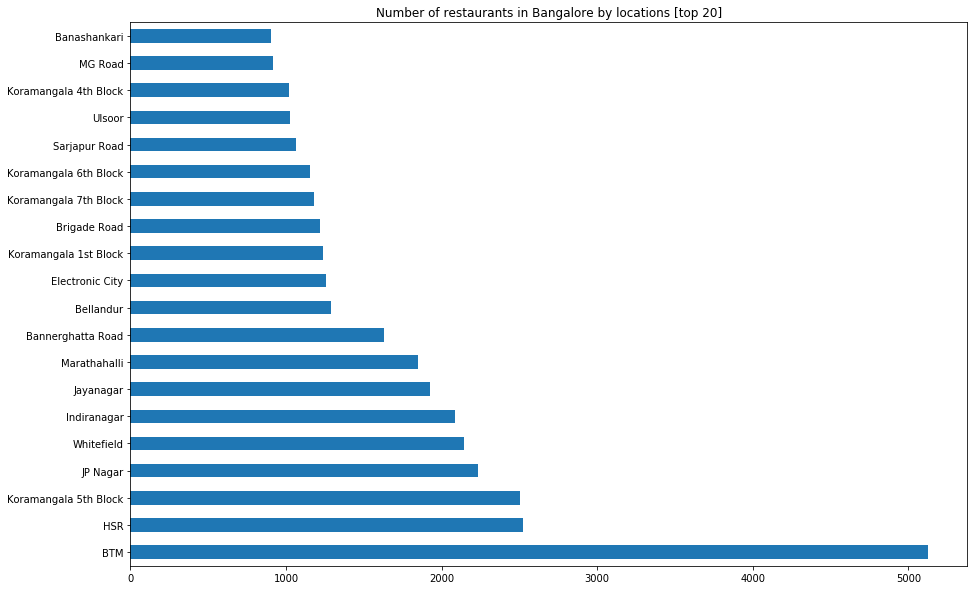

<Figure size 432x288 with 0 Axes>

In [18]:
location1.plot(kind='barh', figsize=(15, 10), title='Number of restaurants in Bangalore by locations [top 20]', ); plt.show()
plt.savefig('by_loc_bar.png')

The top 20 locations for the restaurants is listed as in the bar chart. BTM layout, HSR layout and Koramangala has the maximum number of restaurants in Bangalore

In [19]:
location2=df['listed_city'].value_counts()
location2

BTM                      3279
Koramangala 7th Block    2938
Koramangala 5th Block    2836
Koramangala 4th Block    2779
Koramangala 6th Block    2623
Jayanagar                2371
JP Nagar                 2096
Indiranagar              1860
Church Street            1827
MG Road                  1811
Brigade Road             1769
Lavelle Road             1744
HSR                      1741
Marathahalli             1659
Whitefield               1620
Residency Road           1620
Bannerghatta Road        1617
Brookefield              1518
Old Airport Road         1425
Kammanahalli             1329
Kalyan Nagar             1309
Basavanagudi             1266
Sarjapur Road            1261
Electronic City          1229
Bellandur                1227
Frazer Town              1185
Malleshwaram             1096
Rajajinagar              1079
Banashankari              863
New BEL Road              740
Name: listed_city, dtype: int64

In [20]:
from geopy.geocoders import Nominatim   # geodecoder by location name

In [21]:
locations=pd.DataFrame({"Name":df['location'].unique()})
locations['Name']=locations['Name'].apply(lambda x: "Bangalore " + str(x))
geolocator=Nominatim(user_agent="user")

lat_lon=[]
for location in locations['Name']:
    location = geolocator.geocode(location, timeout= 10)
    if location is None:
        lat_lon.append(np.nan)
    else:    
        geo=(location.latitude,location.longitude)
        lat_lon.append(geo)

locations['geo_pos']=lat_lon

In [22]:
locations["Name"]=locations['Name'].apply(lambda x :  x.replace("Bangalore","")[1:]); locations.head()

,Name,geo_pos
0,Banashankari,"(12.9152208, 77.573598)"
1,Basavanagudi,"(12.9417261, 77.5755021)"
2,Mysore Road,"(12.5523878, 76.9685867)"
3,Jayanagar,"(12.9292731, 77.5824229)"
4,Kumaraswamy Layout,"(12.9081487, 77.5553179)"


In [23]:
rest_count= pd.DataFrame(df['location'].value_counts().reset_index())
rest_count.columns= ['Name', 'count']
rest_count=rest_count.merge(locations, on = "Name", how = "left" ).dropna()
rest_count.head()

,Name,count,geo_pos
0,BTM,5124,"(12.911275849999999, 77.60456543431182)"
1,HSR,2523,"(12.9116225, 77.6388622)"
2,Koramangala 5th Block,2504,"(13.2923988, 77.7519261)"
3,JP Nagar,2235,"(12.9072515, 77.5782713)"
4,Whitefield,2144,"(12.9696365, 77.7497448)"


In [24]:
import folium
from folium.plugins import HeatMap

In [25]:
maps = folium.Map(location= [12.986601, 77.603424], zoom_start= 12) 
folium.Marker(
    location= [12.966601, 77.573424], 
    popup= 'The central location of bangalore city', 
    icon= folium.Icon(color='orange')
).add_to(maps)

lat , lon= zip(*np.array(rest_count['geo_pos']))
rest_count['lat']= lat
rest_count['lon']= lon

In [26]:
HeatMap(rest_count[['lat', 'lon', 'count']].values.tolist()).add_to(maps)
maps.save('map1.html')
maps

The above prediction can be seen on the map as well. 
There are large number of restaurants around Shivaginagar and K R market, which is usually crowded. 


#### Types of restaurants

In [27]:
df['rest_type'].unique()

array(['Casual Dining', 'Cafe, Casual Dining', 'Quick Bites',
       'Casual Dining, Cafe', 'Cafe', 'Quick Bites, Cafe',
       'Cafe, Quick Bites', 'Delivery', 'Mess', 'Dessert Parlor',
       'Bakery, Dessert Parlor', 'Pub', 'Bakery', 'Takeaway, Delivery',
       'Fine Dining', 'Beverage Shop', 'Sweet Shop', 'Bar',
       'Beverage Shop, Quick Bites', 'Confectionery',
       'Quick Bites, Beverage Shop', 'Dessert Parlor, Sweet Shop',
       'Bakery, Quick Bites', 'Sweet Shop, Quick Bites', 'Kiosk',
       'Food Truck', 'Quick Bites, Dessert Parlor',
       'Beverage Shop, Dessert Parlor', 'Takeaway', 'Pub, Casual Dining',
       'Casual Dining, Bar', 'Dessert Parlor, Beverage Shop',
       'Quick Bites, Bakery', 'Dessert Parlor, Quick Bites',
       'Microbrewery, Casual Dining', 'Lounge', 'Bar, Casual Dining',
       'Food Court', 'Cafe, Bakery', nan, 'Dhaba',
       'Quick Bites, Sweet Shop', 'Microbrewery',
       'Food Court, Quick Bites', 'Pub, Bar', 'Casual Dining, Pub',
      

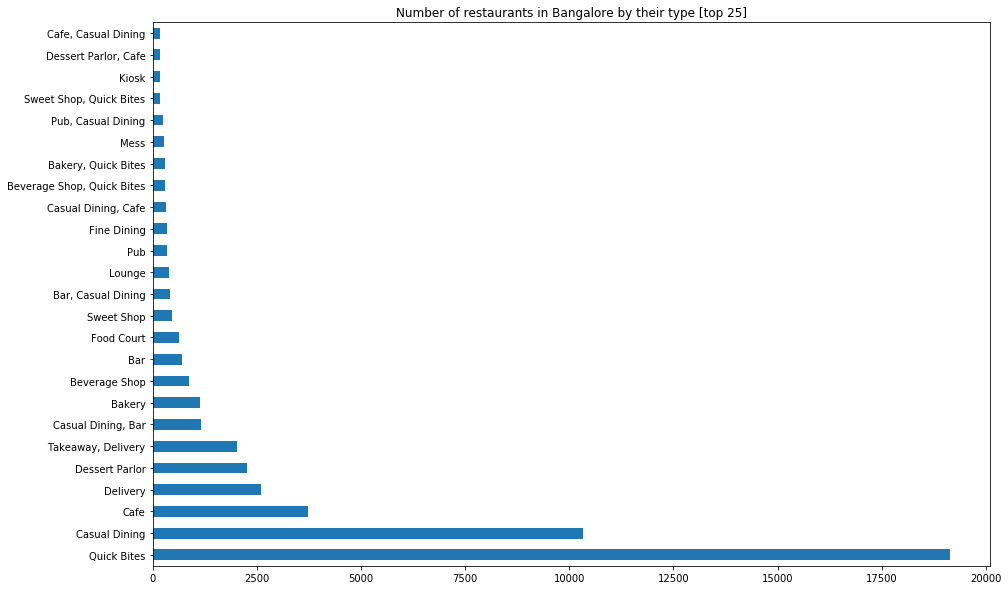

In [28]:
# There are many missing values. Checking the top 25 restaurant types
rest_type1=df['rest_type'].value_counts()[:25]

rest_type1.plot(kind='barh', figsize=(15, 10), title='Number of restaurants in Bangalore by their type [top 25]', )
plt.show()

The most preferred choice of restaurant is  Quick bites and Casual dining followed by Café. 


In [29]:
df['listed_type'].unique()

array(['Buffet', 'Cafes', 'Delivery', 'Desserts', 'Dine-out',
       'Drinks & nightlife', 'Pubs and bars'], dtype=object)

North Indian Restaurants are large in number. Many outlet serve both north and south Indian dishes. 


In [30]:
rest_type2=df['listed_type'].value_counts()
rest_type2

Delivery              25942
Dine-out              17779
Desserts               3593
Cafes                  1723
Drinks & nightlife     1101
Buffet                  882
Pubs and bars           697
Name: listed_type, dtype: int64

#### Restaurant Ownerships

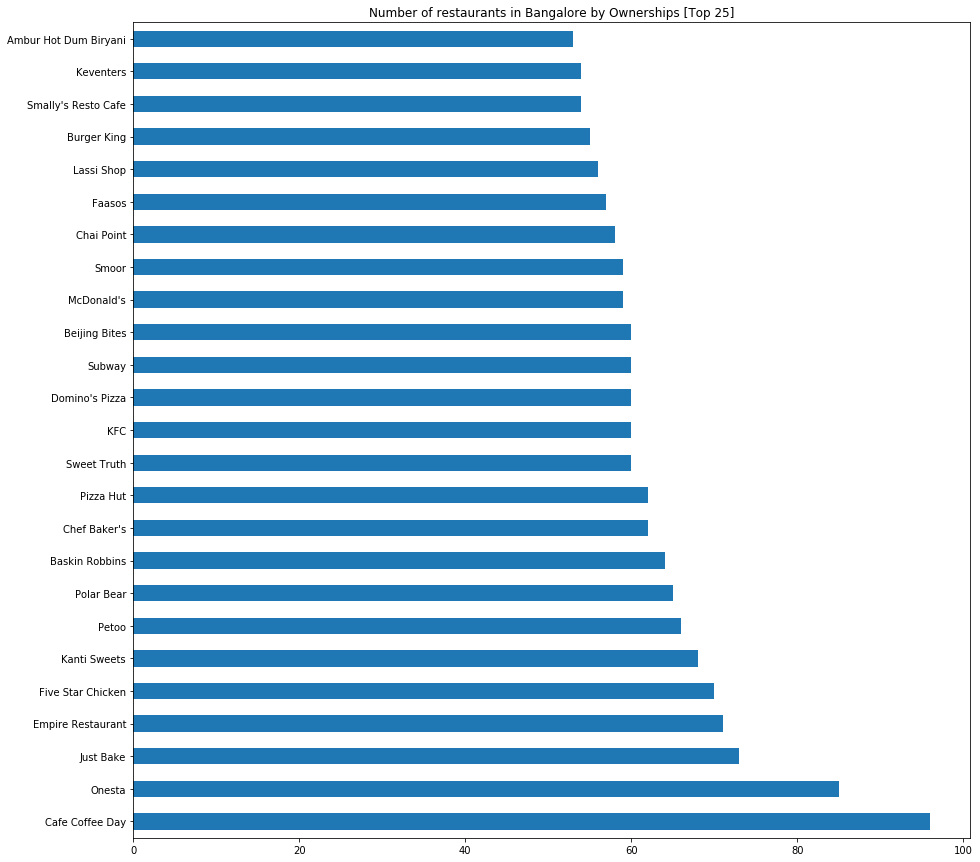

In [31]:
# There are many missing values. Checking the top 50 localities
rest_grp=df['name'].value_counts()[:25]
rest_grp.plot(kind='barh', figsize=(15, 15), title='Number of restaurants in Bangalore by Ownerships [Top 25]', ); plt.show()

Café coffee day has the largest number of outlets. However the numbers of other groups are quite comparable. 

#### Crusines

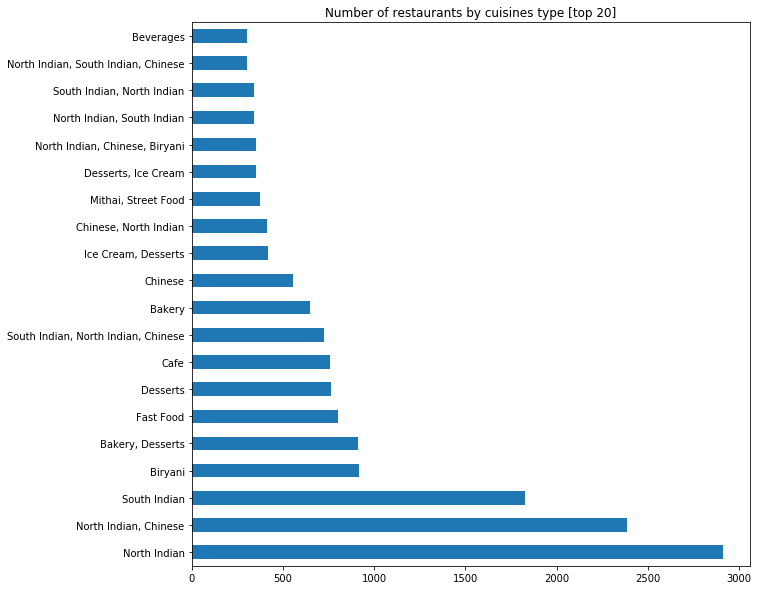

In [32]:
cuisines=df['cuisines'].value_counts()[:20]
cuisines.plot(kind='barh', figsize=(10,10), title='Number of restaurants by cuisines type [top 20]', ); plt.show()

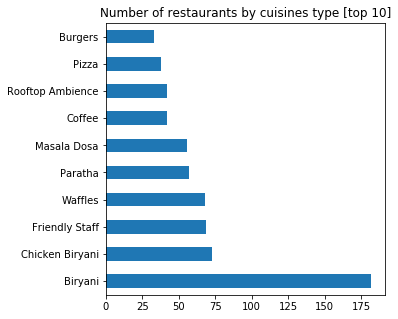

In [33]:
dish_liked=df['dish_liked'].value_counts()[:10]
dish_liked.plot(kind='barh', figsize=(5,5), title='Number of restaurants by cuisines type [top 10]', ); plt.show()

The most favoured recipe in Bangalore is Biriyani . Other favourite dishes are Paratha and Masala dosa

#### Cost 

In [34]:
df.average_cost.describe()

count    51371.000000
mean       360.726620
std        229.913692
min          1.000000
25%        200.000000
50%        350.000000
75%        500.000000
max        950.000000
Name: average_cost, dtype: float64

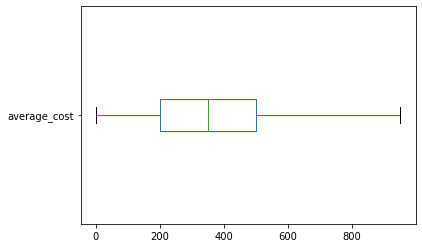

In [35]:
df.average_cost.plot(kind='box', vert=0)

The cost aspects are shown in the box plot. The average cost for two is around 360 rs while max is 950 rs. 

#### Rating of restaurants

In [36]:
df.corr()

,rate,votes,average_cost
rate,1.000000,0.434040,-0.115575
votes,0.434040,1.000000,-0.094479
average_cost,-0.115575,-0.094479,1.000000


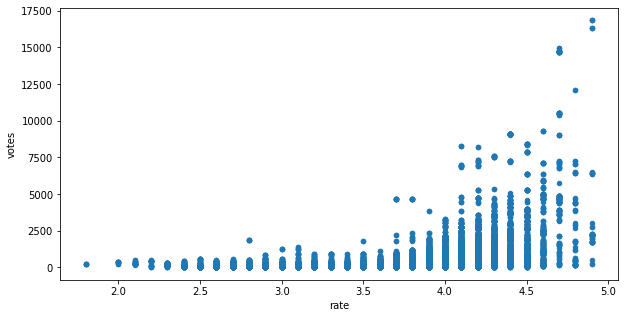

In [37]:
df.plot(kind='scatter', x='rate', y='votes', figsize=(10,5))

In [38]:
df.rate.describe()

count    41665.000000
mean         3.700449
std          0.440513
min          1.800000
25%          3.400000
50%          3.700000
75%          4.000000
max          4.900000
Name: rate, dtype: float64

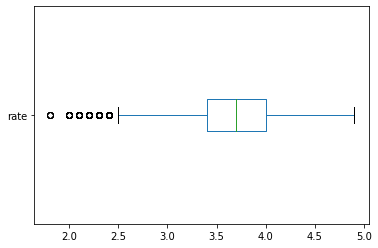

In [39]:
df.rate.plot(kind='box', vert=0)

From scatter plot we can say that there are very few votes for rating below 3.5. The average rate being 3.7. The maximum rating is 4.9

### Detailed Analysis

First let us visualise the south indian restaurant locations on map

In [40]:
# south restaurants
south_data=  pd.DataFrame(df[df['cuisines']== 'South Indian'].groupby(['location'], as_index= False)['url'].agg('count'))
south_data.columns= ['Name', 'count']
south_data = south_data.merge(locations, on = 'Name', how = 'left' ).dropna()
lat , lon= zip(*np.array(south_data['geo_pos']))
south_data['lat'] = lat
south_data['lon'] = lon
south_data.head()

,Name,count,geo_pos,lat,lon
0,BTM,113,"(12.911275849999999, 77.60456543431182)",12.911276,77.604565
1,Banashankari,86,"(12.9152208, 77.573598)",12.915221,77.573598
2,Banaswadi,37,"(13.0141618, 77.6518539)",13.014162,77.651854
3,Bannerghatta Road,48,"(12.8264929, 77.5864733)",12.826493,77.586473
4,Basavanagudi,89,"(12.9417261, 77.5755021)",12.941726,77.575502


In [41]:
maps2 = folium.Map(location= [12.986601, 77.603424], zoom_start= 12) 
folium.Marker(
    location= [12.966601, 77.573424], 
    popup= 'The central location of bangalore city', 
    icon= folium.Icon(color='orange')
).add_to(maps2)

HeatMap(south_data[['lat', 'lon', 'count']].values.tolist()).add_to(maps2)
maps

In [42]:
### Let us analyse the south indian restaurants
# First lets filter data
sdf=df.copy()
indexNames = sdf[sdf['cuisines'] != 'South Indian'].index
sdf.drop(indexNames , inplace=True)
sdf.reset_index(drop=True, inplace=True)
sdf.head(2)

,url,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,average_cost,reviews_list,menu_item,listed_type,listed_city
0,https://www.zomato.com/bangalore/maruthi-davan...,Maruthi Davangere Benne Dosa,Yes,No,4.0,17,Banashankari,Quick Bites,NaN,South Indian,150.0,"[('Rated 5.0', ""RATED\n This restaurant serve...","['Benne Dosa', 'Benne Masala Dosa', 'Benne Kal...",Delivery,Banashankari
1,https://www.zomato.com/bangalore/havyaka-mess-...,Havyaka Mess,No,No,3.9,28,Banashankari,Mess,NaN,South Indian,300.0,"[('Rated 4.0', 'RATED\n Food is good.very hom...",[],Delivery,Banashankari


In [43]:
sdf.drop_duplicates()

,url,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,average_cost,reviews_list,menu_item,listed_type,listed_city
0,https://www.zomato.com/bangalore/maruthi-davan...,Maruthi Davangere Benne Dosa,Yes,No,4.0,17,Banashankari,Quick Bites,NaN,South Indian,150.0,"[('Rated 5.0', ""RATED\n This restaurant serve...","['Benne Dosa', 'Benne Masala Dosa', 'Benne Kal...",Delivery,Banashankari
1,https://www.zomato.com/bangalore/havyaka-mess-...,Havyaka Mess,No,No,3.9,28,Banashankari,Mess,NaN,South Indian,300.0,"[('Rated 4.0', 'RATED\n Food is good.very hom...",[],Delivery,Banashankari
2,https://www.zomato.com/bangalore/namma-brahmin...,Namma Brahmin's Idli,Yes,No,3.6,34,Jayanagar,Quick Bites,NaN,South Indian,100.0,"[('Rated 4.0', 'RATED\n Quite a cosy & small ...","['Tatte Idli', 'Butter Idli', 'Butter Pudi Idl...",Delivery,Banashankari
3,https://www.zomato.com/bangalore/sri-guru-kott...,Sri Guru Kottureshwara Davangere Benne Dosa,Yes,No,4.1,558,Basavanagudi,Quick Bites,"Benne Dosa, Mirchi Bajji, Filter Coffee, Poha,...",South Indian,150.0,"[('Rated 4.0', 'RATED\n My go-to benne dosa p...","['Benne Dose', 'Benne Kali Dose', 'Open Dose',...",Delivery,Banashankari
4,https://www.zomato.com/bangalore/sunsadm-banas...,Sunsadm,No,No,NaN,0,Banashankari,"Takeaway, Delivery",NaN,South Indian,400.0,[],[],Delivery,Banashankari
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1823,https://www.zomato.com/bangalore/dharani-andhr...,Dharani Andhra Style Hotel,No,No,NaN,0,Whitefield,Quick Bites,NaN,South Indian,200.0,[],[],Dine-out,Whitefield
1824,https://www.zomato.com/bangalore/the-south-whi...,The South,No,No,3.7,21,Whitefield,Quick Bites,NaN,South Indian,200.0,"[('Rated 5.0', ""RATED\n I also always wanted ...",[],Dine-out,Whitefield
1825,https://www.zomato.com/bangalore/the-andhra-bh...,The Andhra Bhojanam,Yes,No,3.3,7,"ITPL Main Road, Whitefield",Bhojanalya,NaN,South Indian,300.0,"[('Rated 2.0', ""RATED\n Visited only once whe...","['Chicken Pepper Dry', 'Poori [3 Pieces]', 'Ch...",Dine-out,Whitefield
1826,https://www.zomato.com/bangalore/slv-grand-itp...,SLV Grand,Yes,No,3.3,66,"ITPL Main Road, Whitefield",Quick Bites,NaN,South Indian,300.0,"[('Rated 1.0', ""RATED\n Very low quality food...","['Jeera Rice', 'Veg Pulao', 'Veg Biryani', 'Hy...",Dine-out,Whitefield


In [44]:
sdf.drop(columns=['url','listed_city','cuisines','listed_type'], inplace=True) 

In [45]:
sdf.head(2)

,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,average_cost,reviews_list,menu_item
0,Maruthi Davangere Benne Dosa,Yes,No,4.0,17,Banashankari,Quick Bites,NaN,150.0,"[('Rated 5.0', ""RATED\n This restaurant serve...","['Benne Dosa', 'Benne Masala Dosa', 'Benne Kal..."
1,Havyaka Mess,No,No,3.9,28,Banashankari,Mess,NaN,300.0,"[('Rated 4.0', 'RATED\n Food is good.very hom...",[]


In [46]:
sdf_type=sdf['rest_type'].value_counts()[:5]

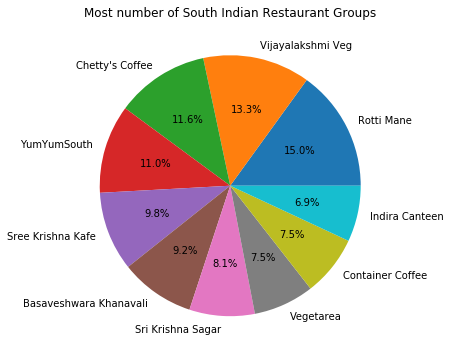

In [47]:
sdf.name.value_counts()[:10].plot(kind='pie', 
                                  figsize=(6,6), 
                                  title='Most number of South Indian Restaurant Groups', 
                                  startangle=0, 
                                  label='',
                                  autopct='%1.1f%%')
plt.show()

Vijayalakshmi, chetty’s coffee and Yum Yum South has large number of outlets

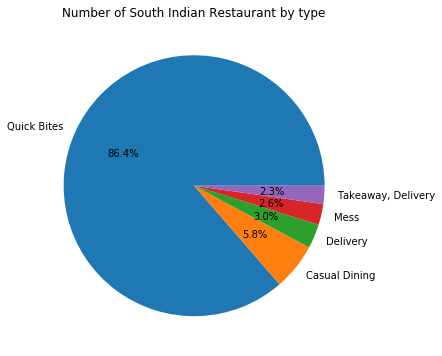

In [48]:
sdf_type.plot(kind='pie', 
              figsize=(6,6), 
              title='Number of South Indian Restaurant by type', 
              startangle=0, 
              autopct='%1.1f%%')
plt.ylabel(' '); plt.show()

Almost all the south Indian restaurants are quick bite type. Very few are casual dining. One can see scope for Casual dining restaurants. 

In [49]:
sdf['book_table'].value_counts()

No     1815
Yes      13
Name: book_table, dtype: int64

In [50]:
sdf['online_order'].value_counts()

No     1096
Yes     732
Name: online_order, dtype: int64

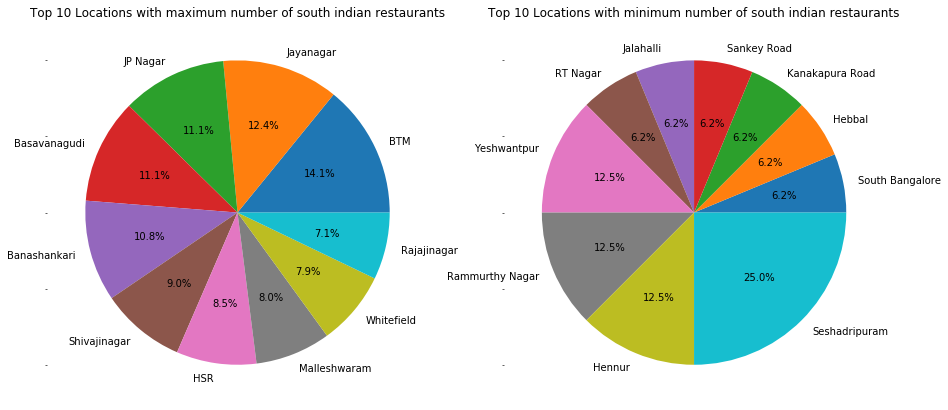

In [51]:
figure, axes = plt.subplots(1,2, sharey=True)
sdf['location'].value_counts(ascending=False)[:10].plot(ax=axes[0],
    kind='pie', 
    figsize=(15,15), 
    title='Top 10 Locations with maximum number of south indian restaurants', 
    startangle=0, 
    label='',
    autopct='%1.1f%%')

sdf['location'].value_counts(ascending=True)[:10].plot(ax=axes[1],
    kind='pie', 
    figsize=(15,15), 
    title='Top 10 Locations with minimum number of south indian restaurants', 
    startangle=0, 
    autopct='%1.1f%%' )
plt.show()

In [52]:
#south indian restaurants with rating > 4.5
sdf.loc[sdf['rate'] > 4.5, ['name', 'rate', 'location']]

,name,rate,location
41,Taaza Thindi,4.7,Banashankari
178,Brahmin's Coffee Bar,4.8,Basavanagudi
365,Oota Bangalore,4.6,Whitefield
1306,CTR,4.7,Malleshwaram
1341,CTR,4.7,Malleshwaram
1588,CTR,4.8,Malleshwaram
1641,CTR,4.8,Malleshwaram
1799,Oota Bangalore,4.6,Whitefield


Taaza Thindi, Bramhin’s coffee bar, Oota Bangalore and CTR are very good choice in Bangalore. `

In [53]:
sdf.rate.mean()

3.629092382495952

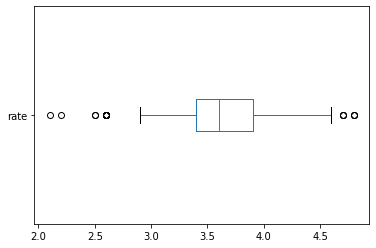

In [54]:
sdf.rate.plot(kind='box', vert=0,)
plt.show()

## Results and Discussion <a name="results"></a>

From the analysis we observe the following
* BTM layout has maximum number of restaurants. There are more than 2000 restaurants in Whitefield already
* Quick bites and Casual dining are the  is the most common type of restaurant types in Bangalore. Noticeably there is large number of delivery only services without dining options. 
* Café coffee day has the maximum number of outlets in Bangalore followed by Onesta and Just bake which are bakeries. Empire Group is the maximum number of casual dining restaurants.
* Biriyani is the most popular dish in Bangalore. Other popular menu items are masala dosa and paratha. 
* Most restaurants allow online delivery but few allow online table  booking. This can indicate restaurants are small business. 

## Conclusion <a name="conclusion"></a>

* The South Indian restaurant has quite demand since there are not many outlets in several locations when compared to other types. However most of the restaurants serve both south and north Indian style of food. One should be careful about this choice to serve only south Indian dishes.
* From the analysis we can conclude that
    * Scope for south Indian restaurant with casual dining is large since most of them doest have seating. 
    * Most common dishes should be masala dosa, paratha and Biriyani. 
    * Most preferred location is around Jayanagar, JP nagar and Basavanagudi. A sepearte survey may be needed to access if there is demand for south Indian dishes in other locations. 
    * The competition should be kept in mind: The top restaurants are Bramhin’s coffee, CTR,  Oota and Taaza Thindi. 
    * Online ordering will add value to the restaurant. 
